In [13]:
using JLD, Mamba
include("gyncycle.jl")

acceptance(mc::Array) = mapslices(mc,[1,2]) do mc
    n = size(mc,1)
    sum([mc[i,:,:] != mc[i+1,:,:] for i in 1:n-1]) / (n-1);
  end |> vec

acceptance(c::AbstractChains) = acceptance(c.value)

mergeparms!(aparms, sparms) = (aparms[SAMPLEPARMS]=sparms; aparms)

mergeparms(aparms,sparms) = mergeparms!(copy(aparms), sparms)

function loglikelihood(mc::Array{Float64,3}, data::Matrix)
    mapslices(mc.value, 2) do modelparms
        aparms = mergeparms(parms, modelparms[1:length(SAMPLEPARMS)])
        y0 = modelparms[length(SAMPLEPARMS)+1:end]
        loglikelihood(data, aparms, y0)
    end
end

mergepersons(mcs) = cat(3,map(x->x[1:minimum(map(x->size(x,1), mcs)),:,:],mcs)...);

loglikelihood(mc::AbstractChains, data::Matrix) = loglikelihood(mc.value, data);

In [29]:
@time mcs = load("lognorm-notimeshift.jld")["mc"] |> mergepersons
mcs = Chains(mcs, names = vcat(parameternames[SAMPLEPARMS], speciesnames))
println(size(mcs))
println(acceptance(mcs))

  1.720053 seconds (428 allocations: 4.104 GB, 20.72% gc time)
(532200,115,3)
[0.4374059327432032,0.15095669101219655,0.4577611006409257]


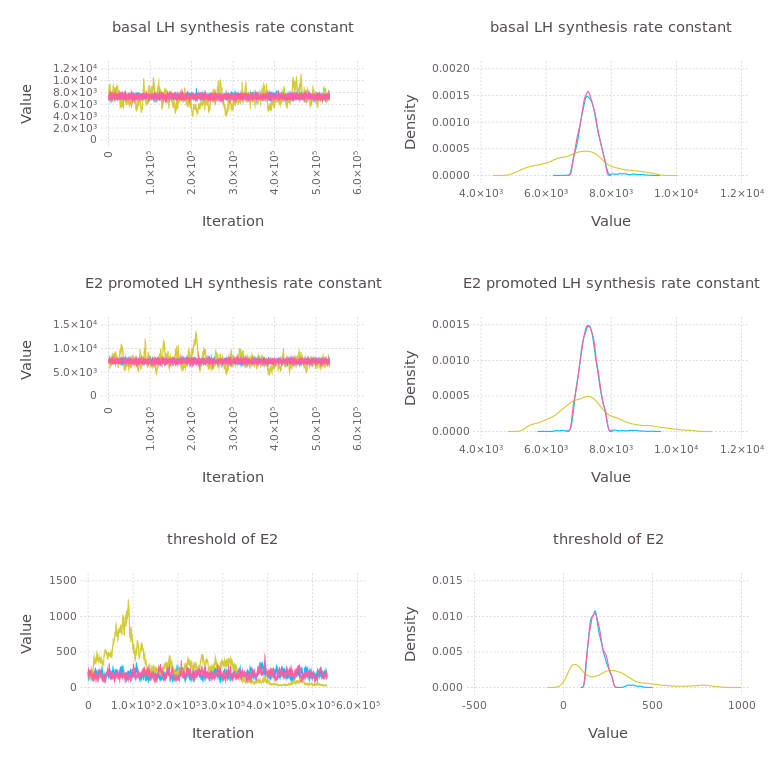

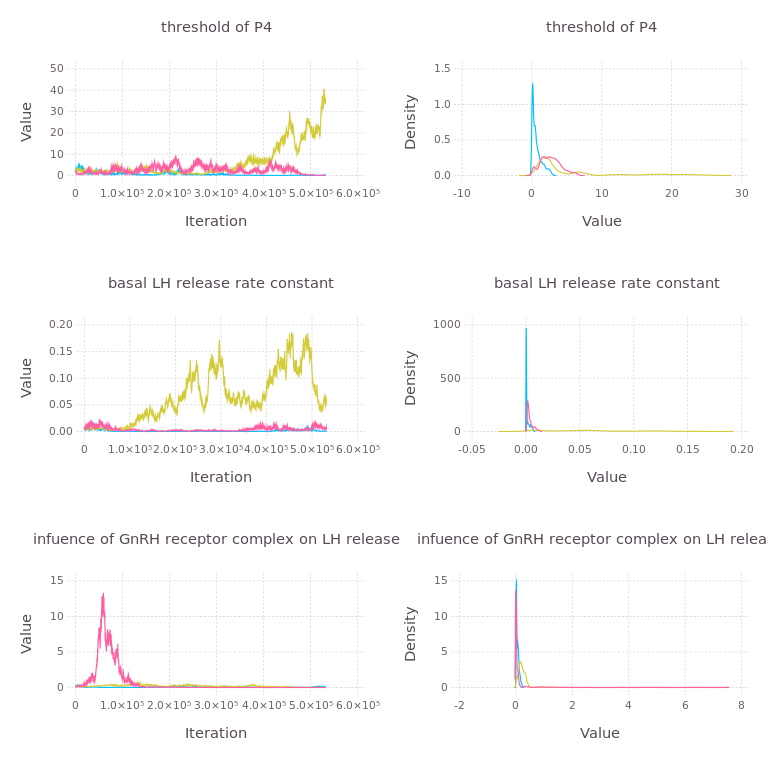

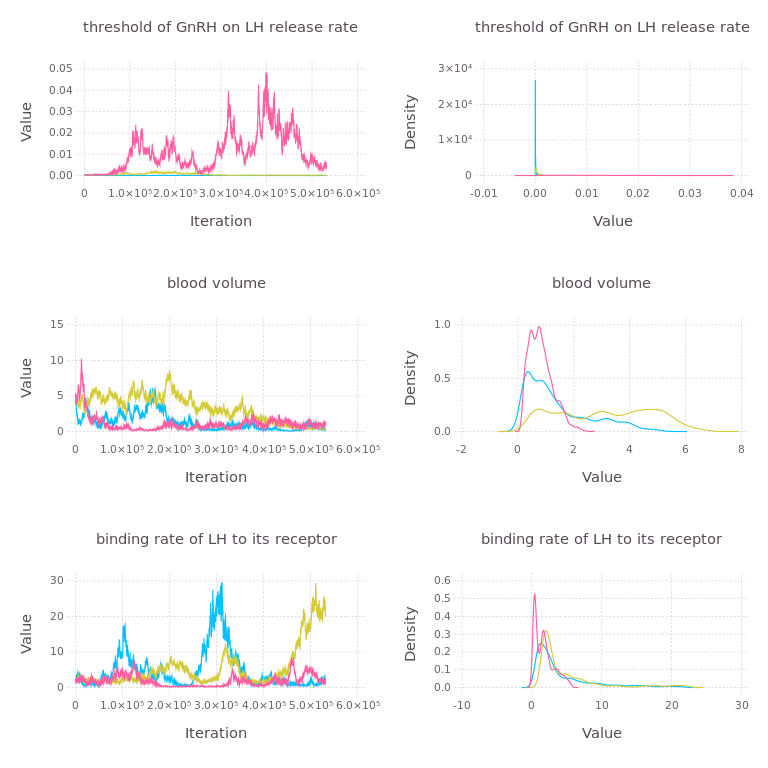

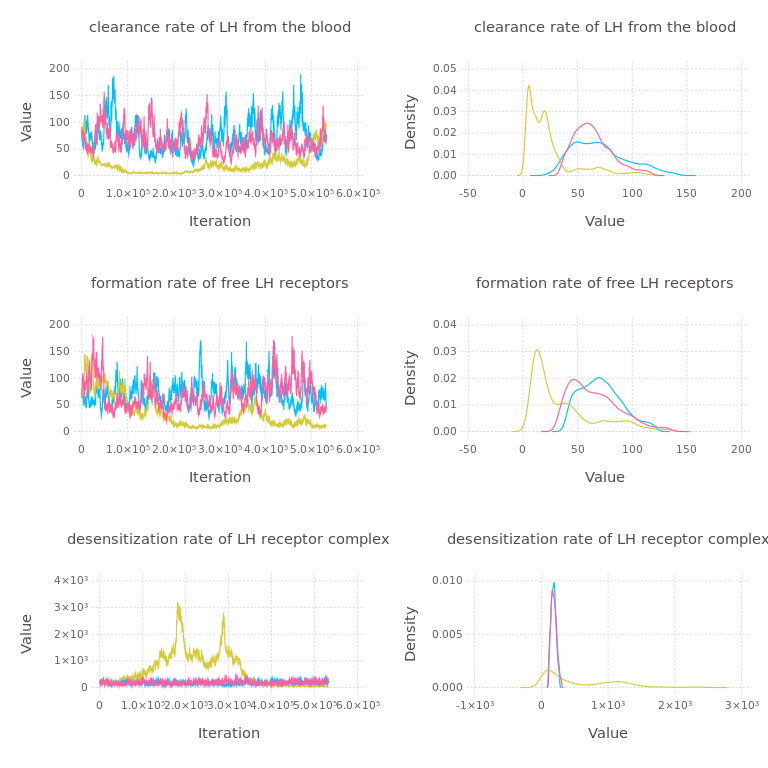

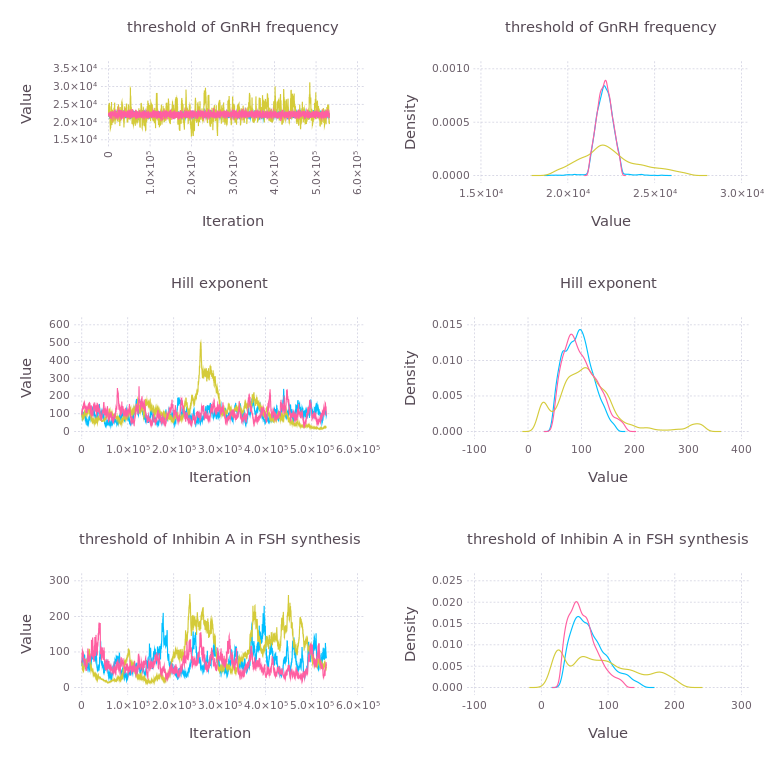

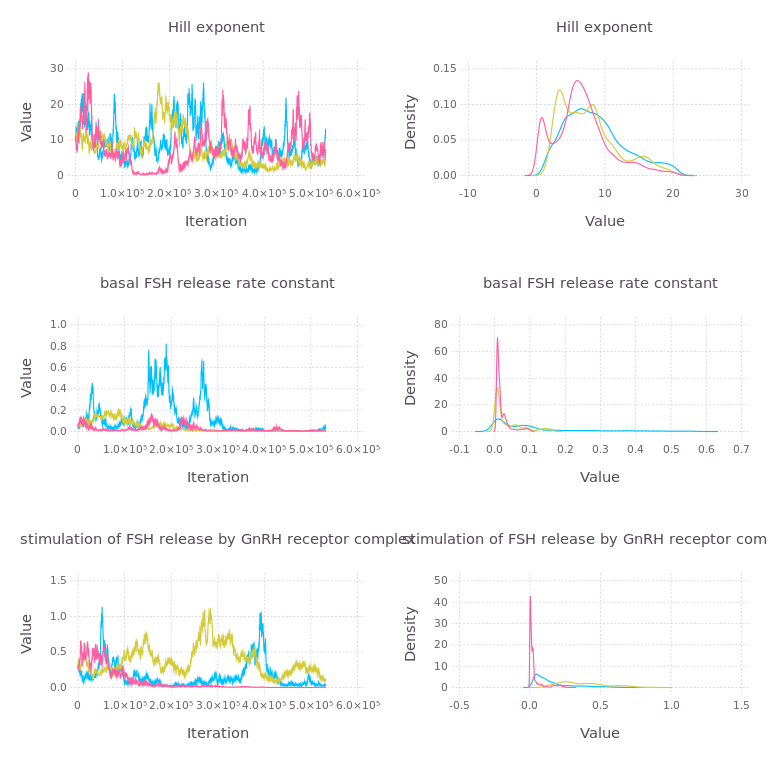

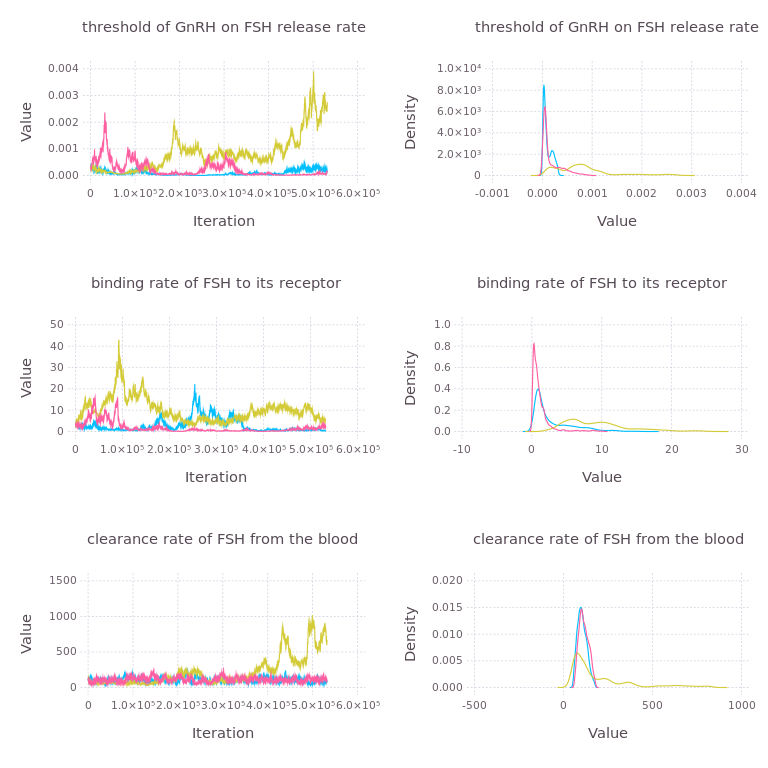

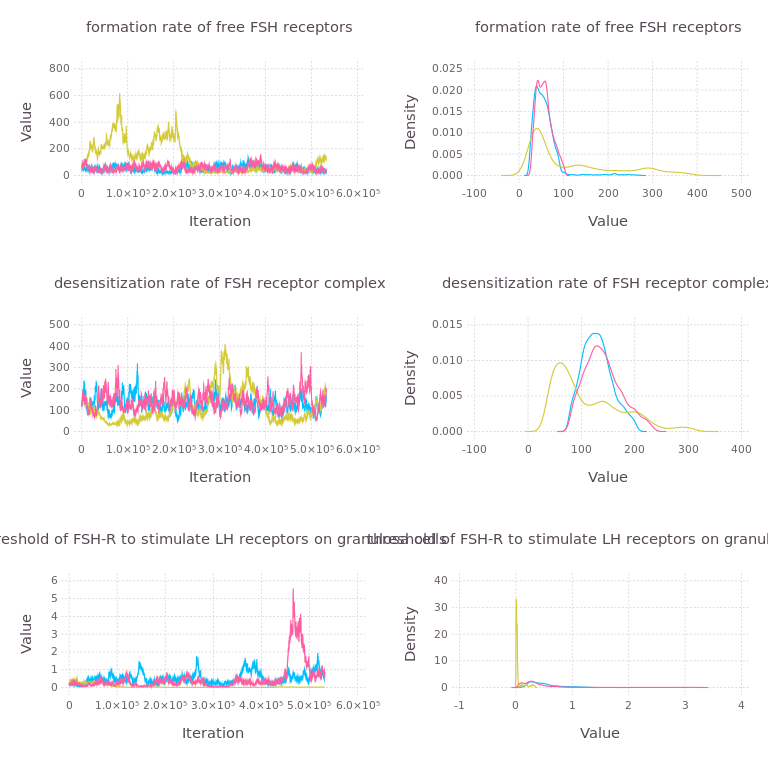

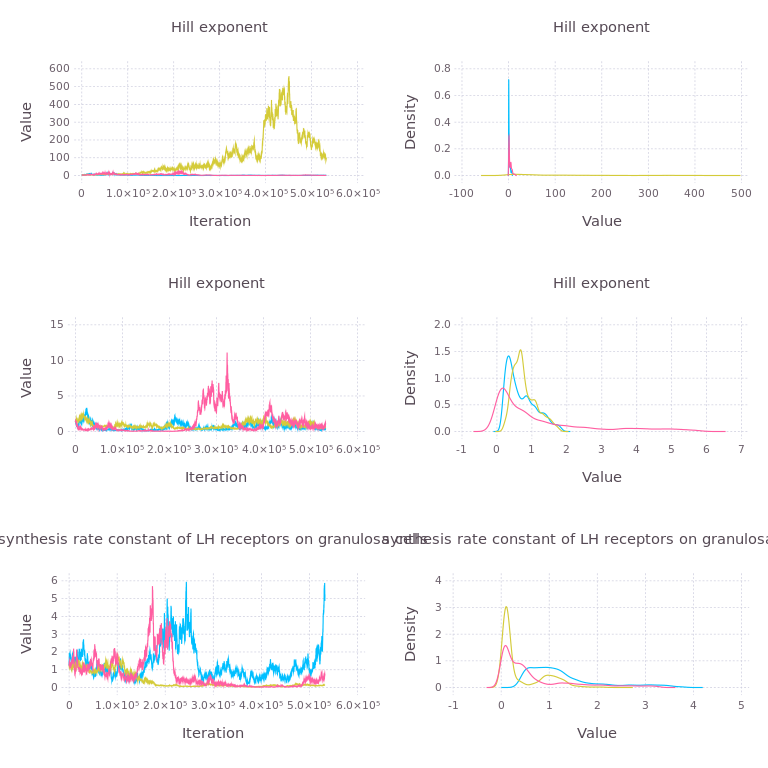

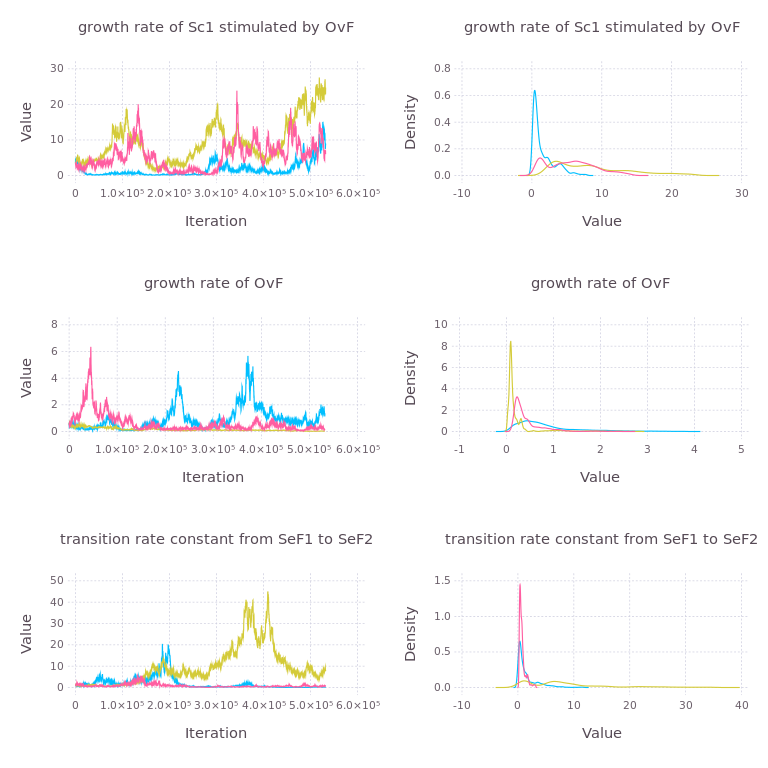

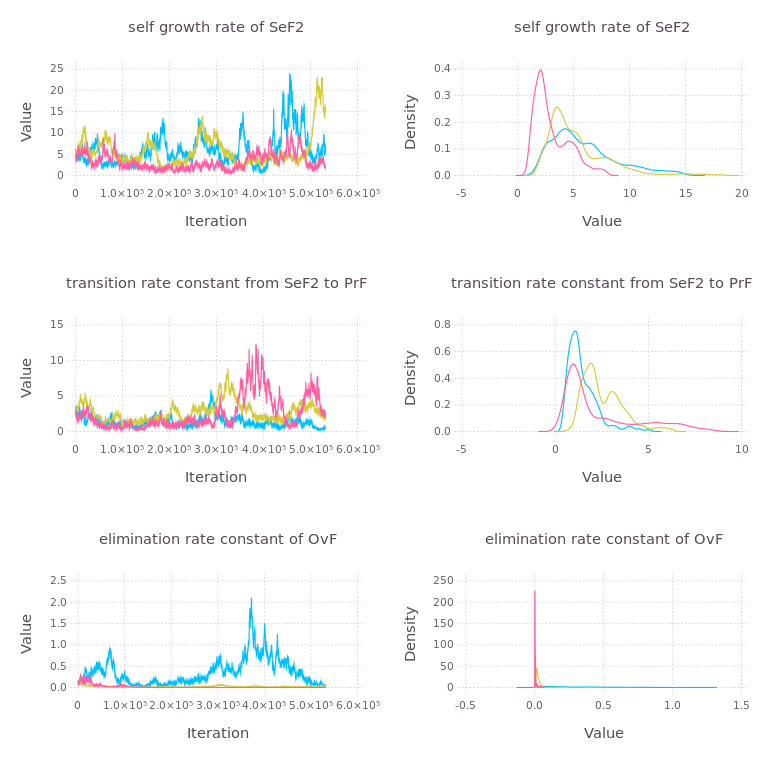

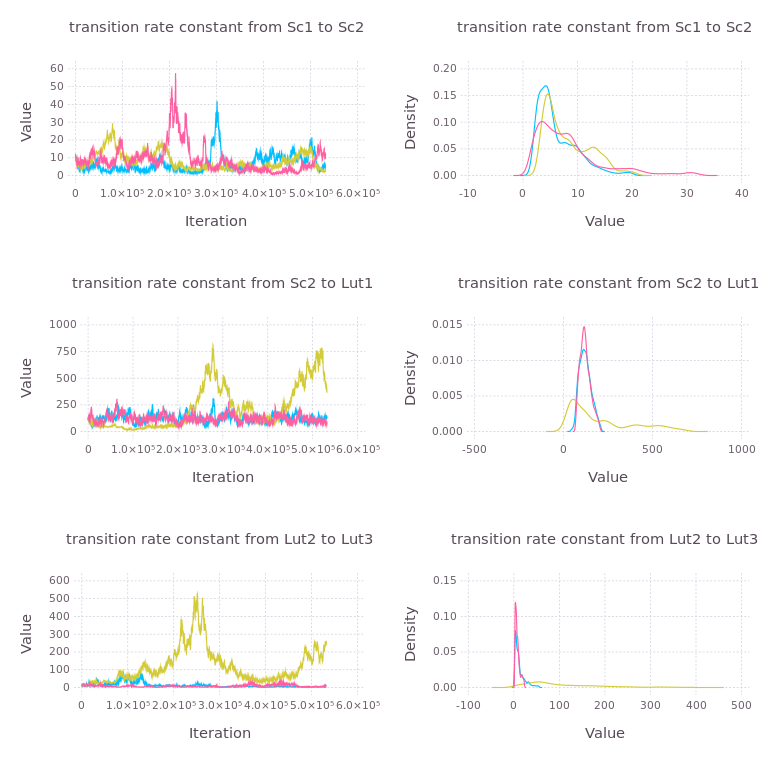

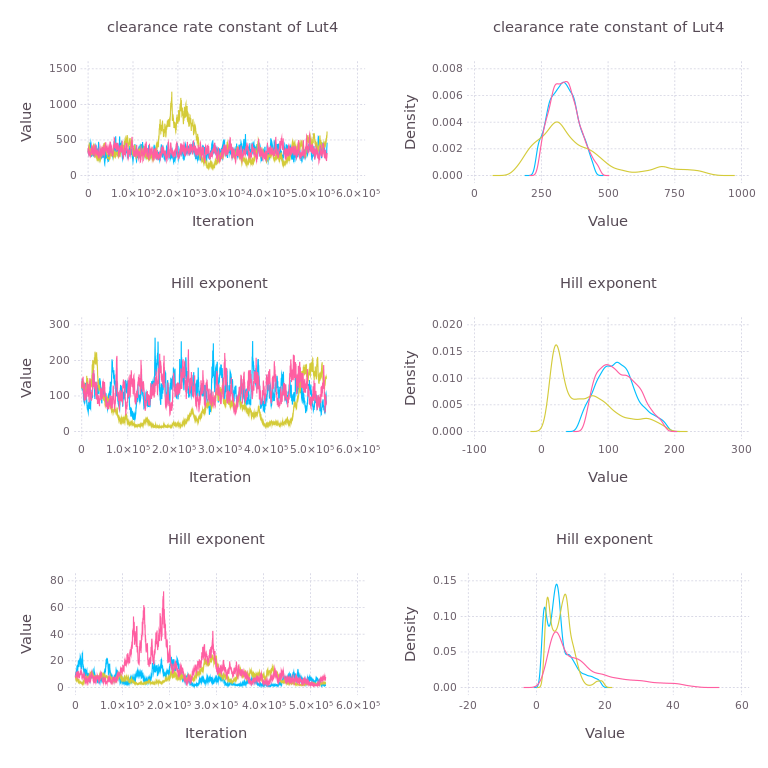

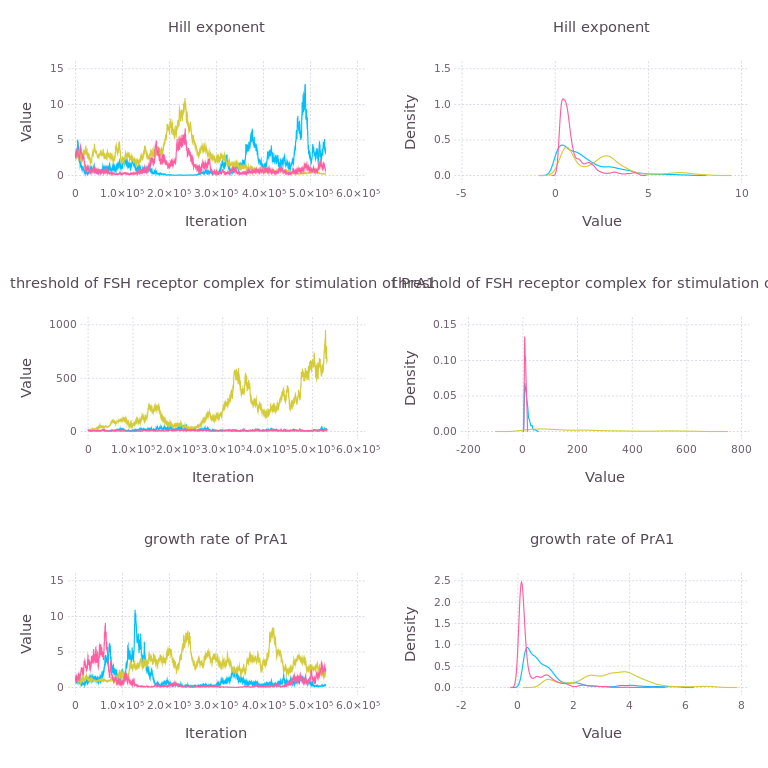

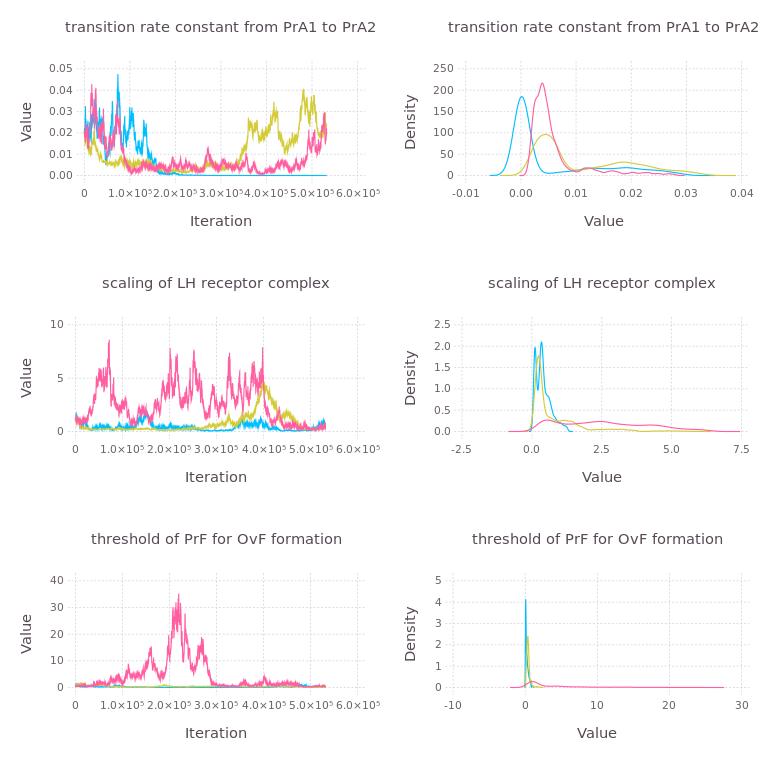

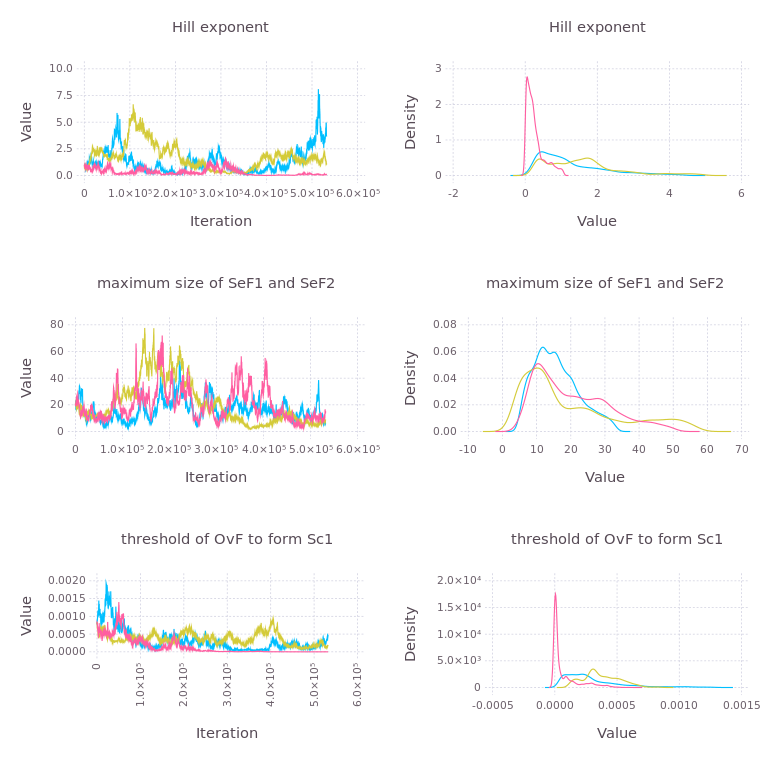

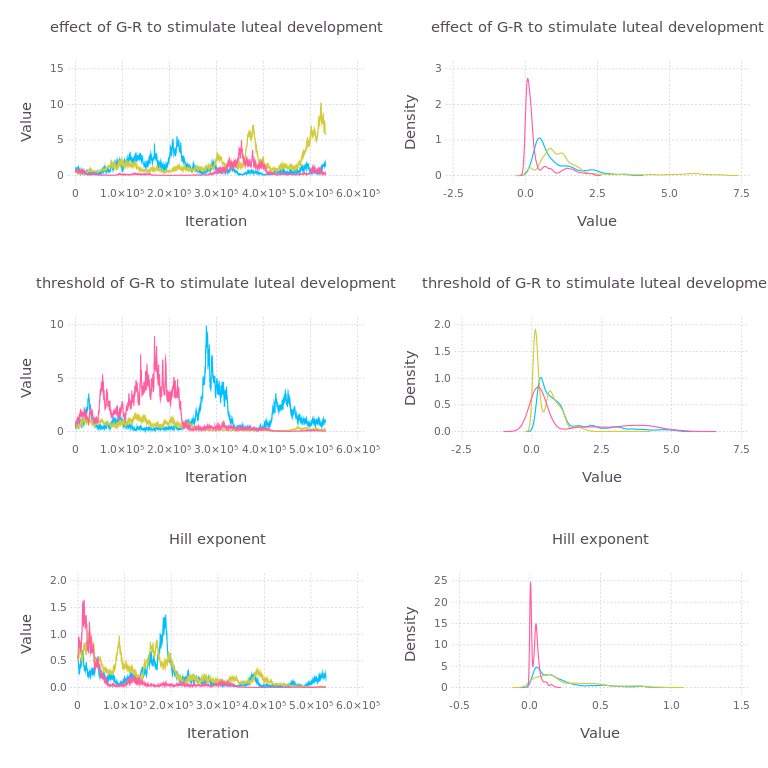

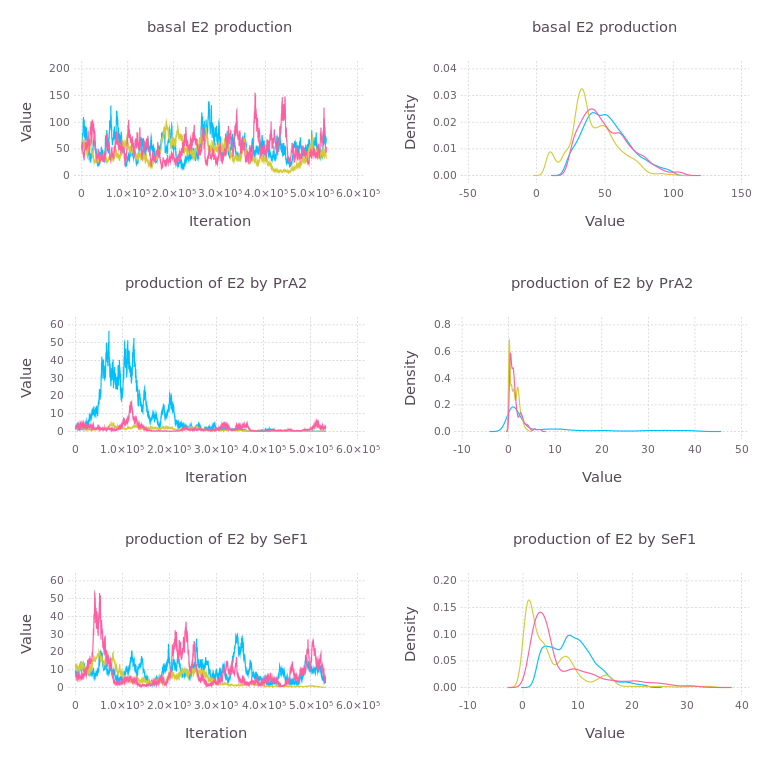

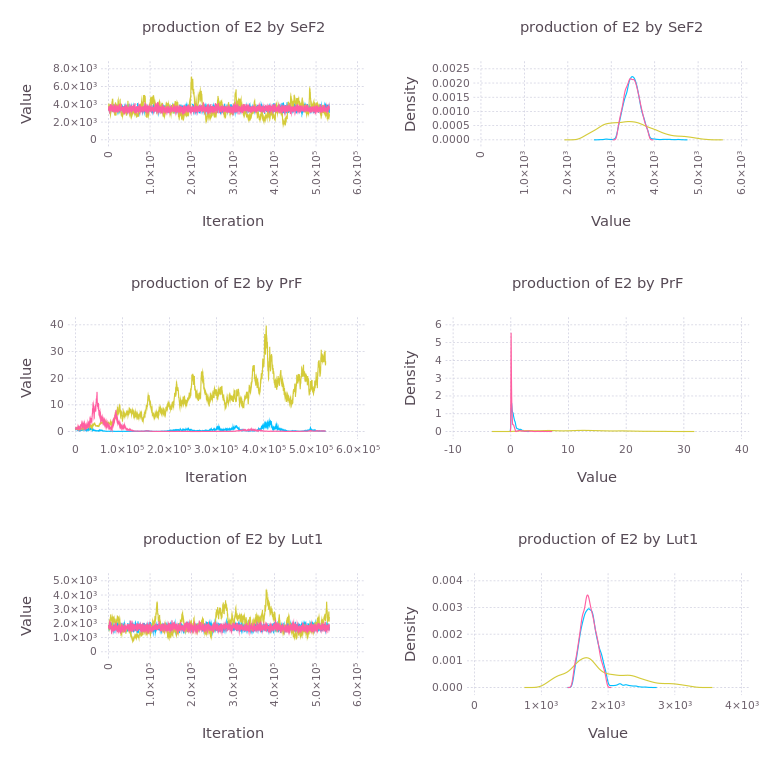

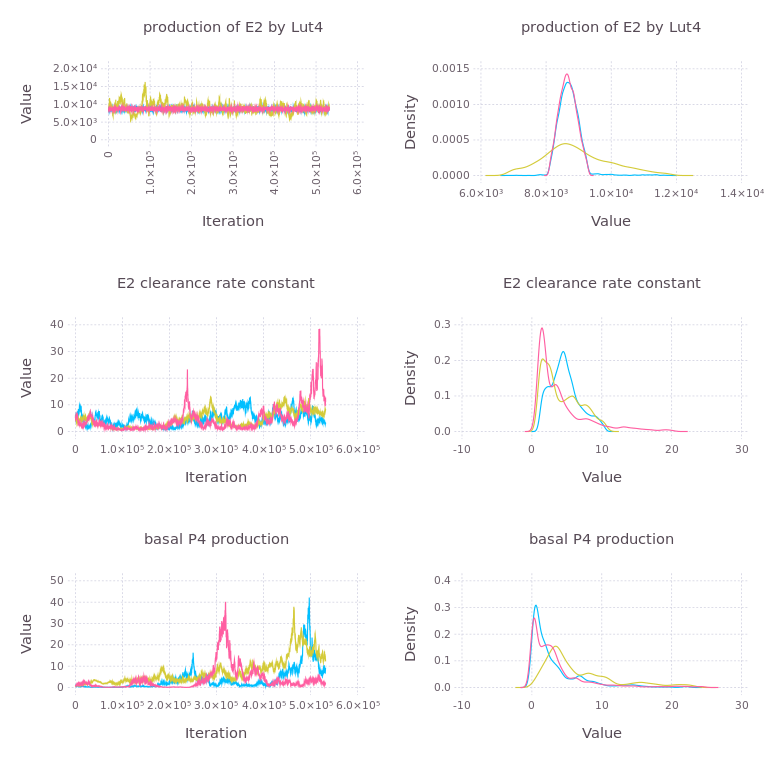

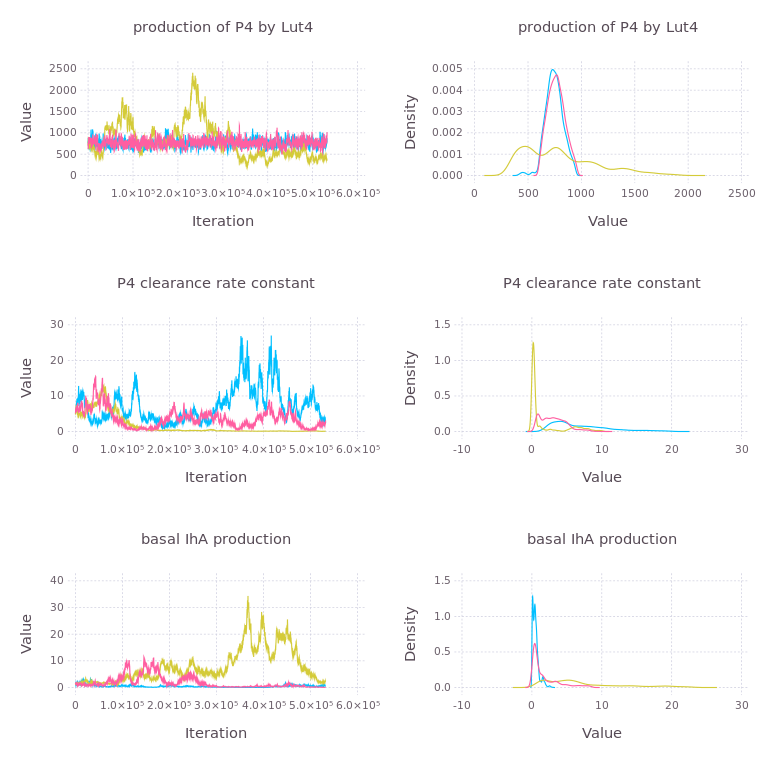

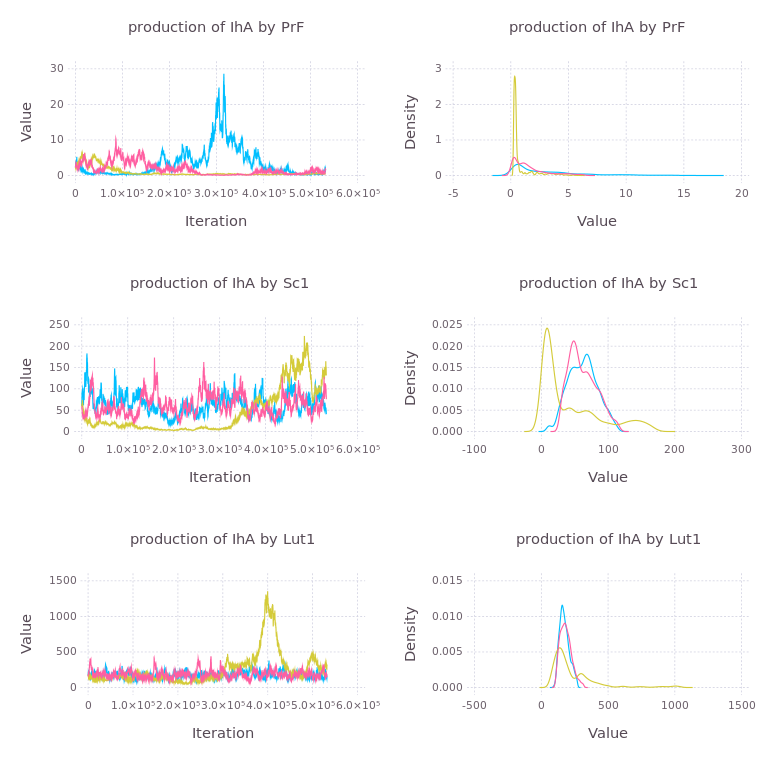

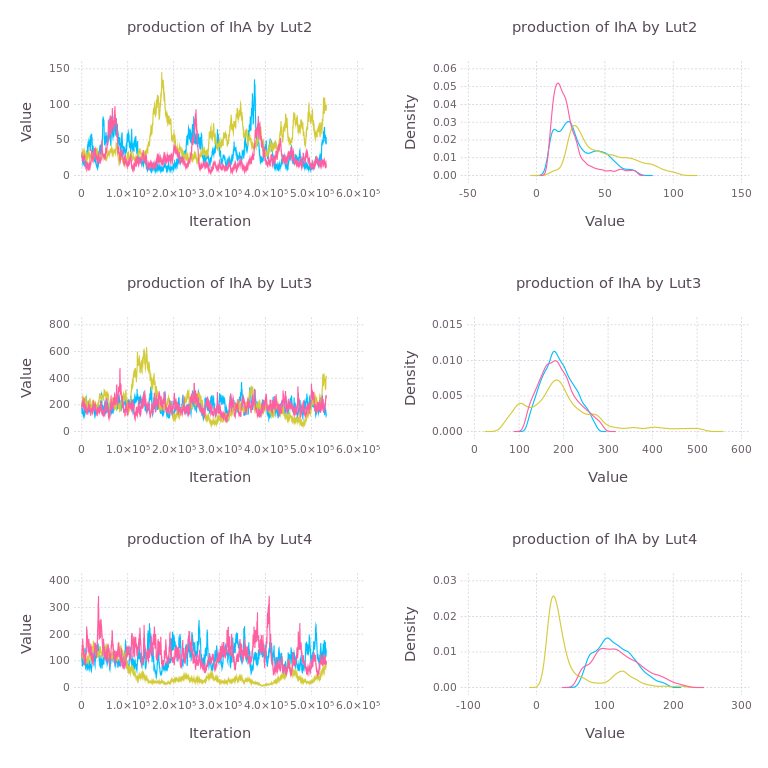

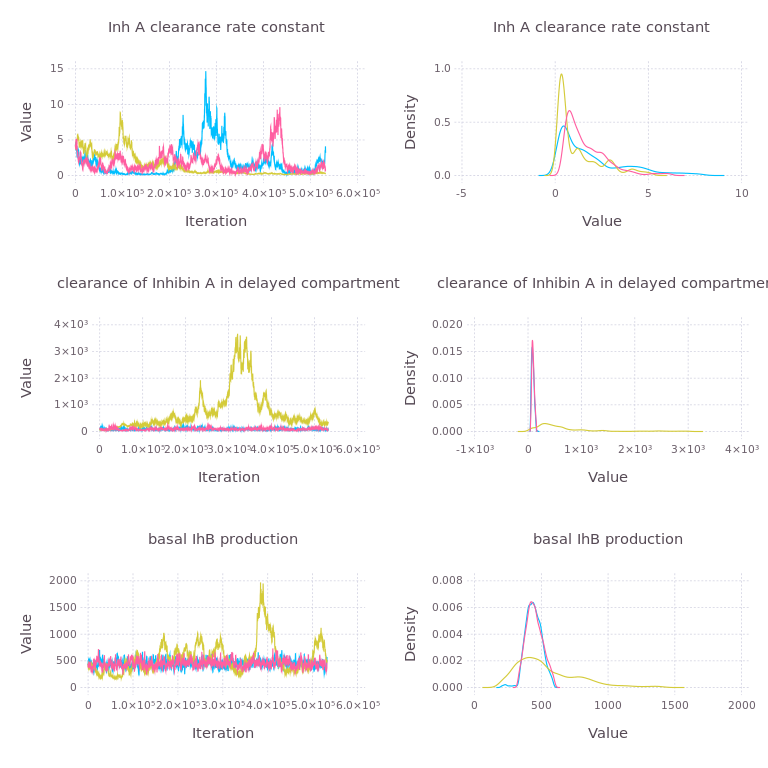

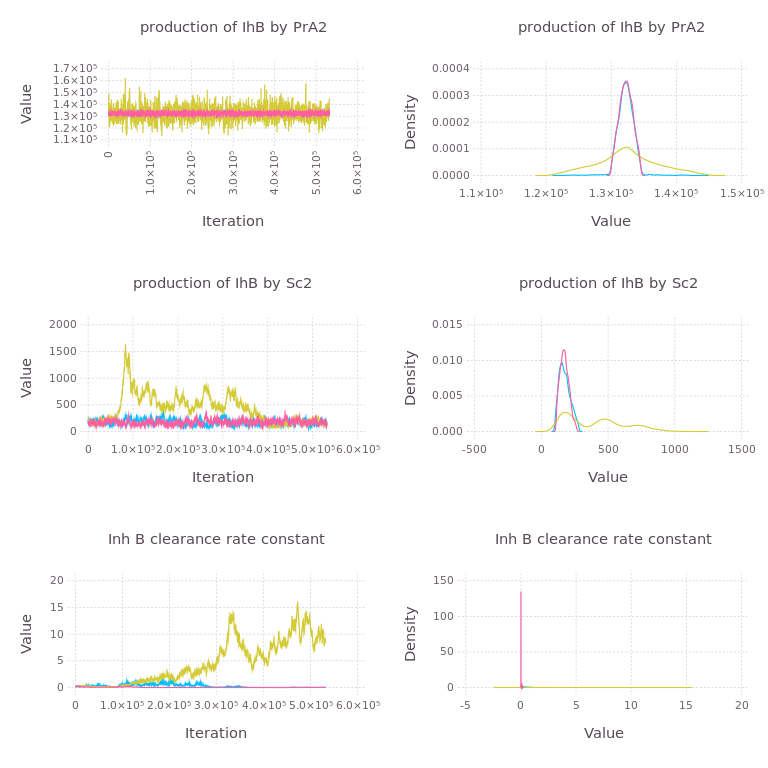

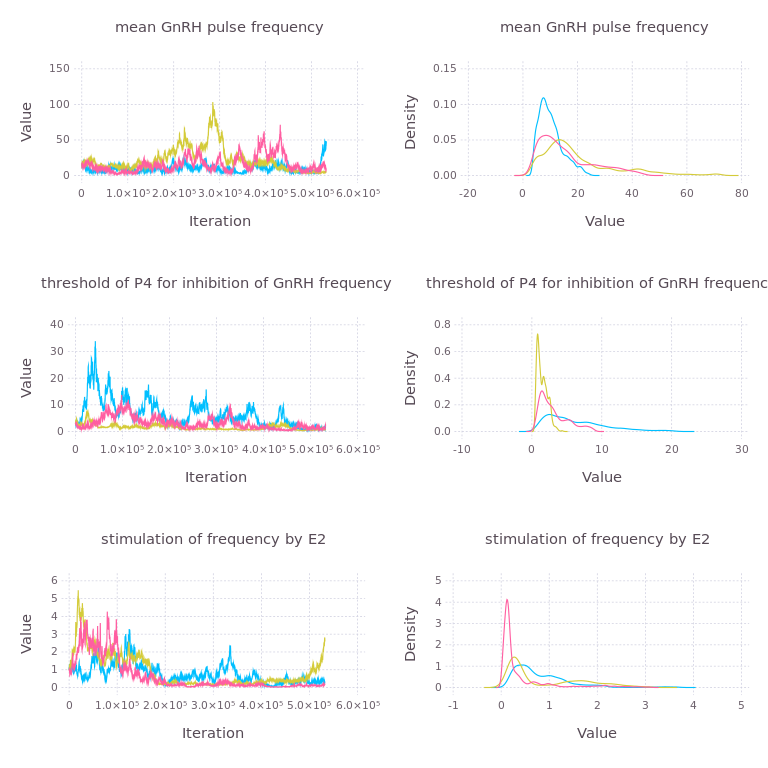

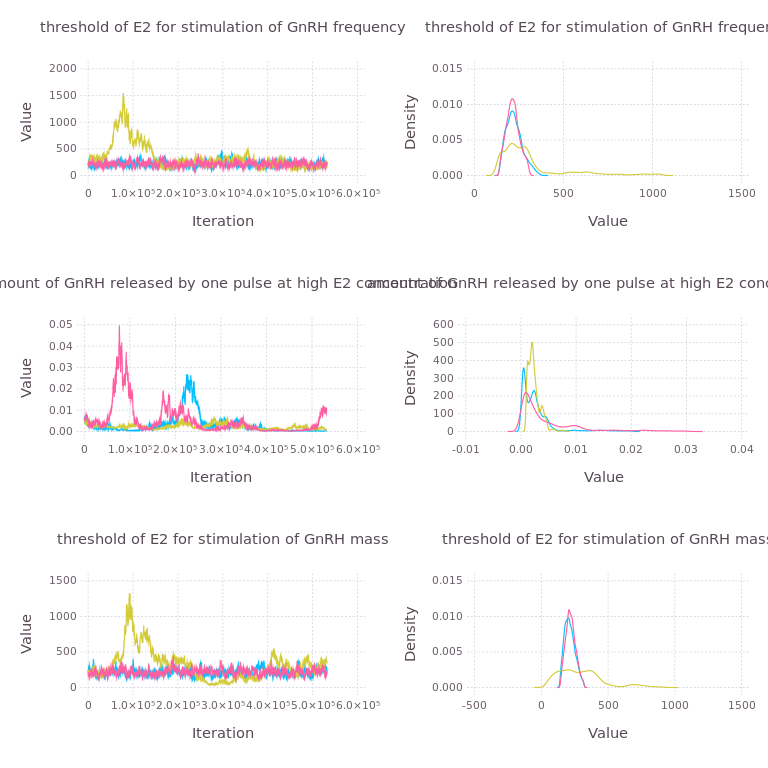

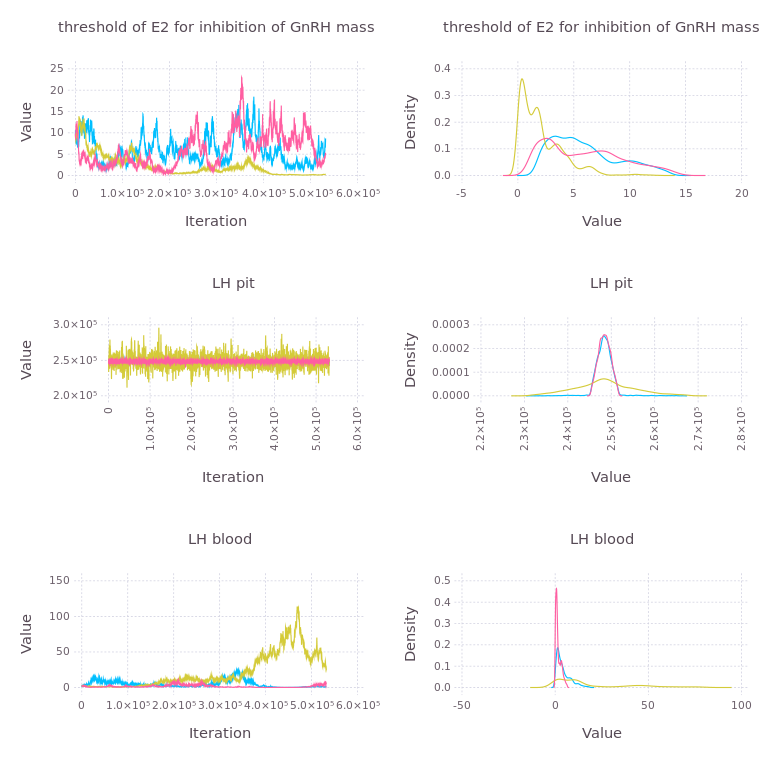

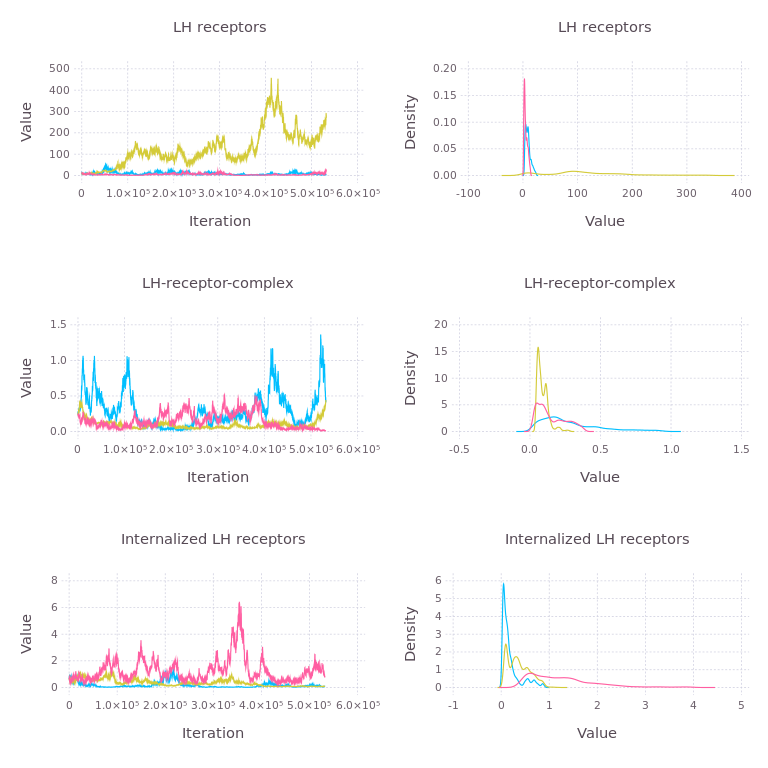

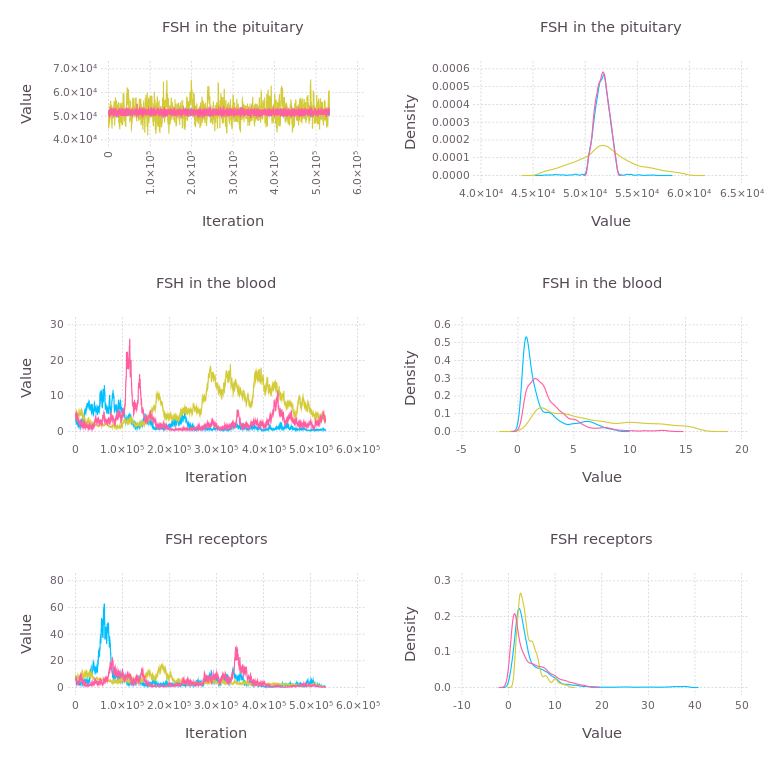

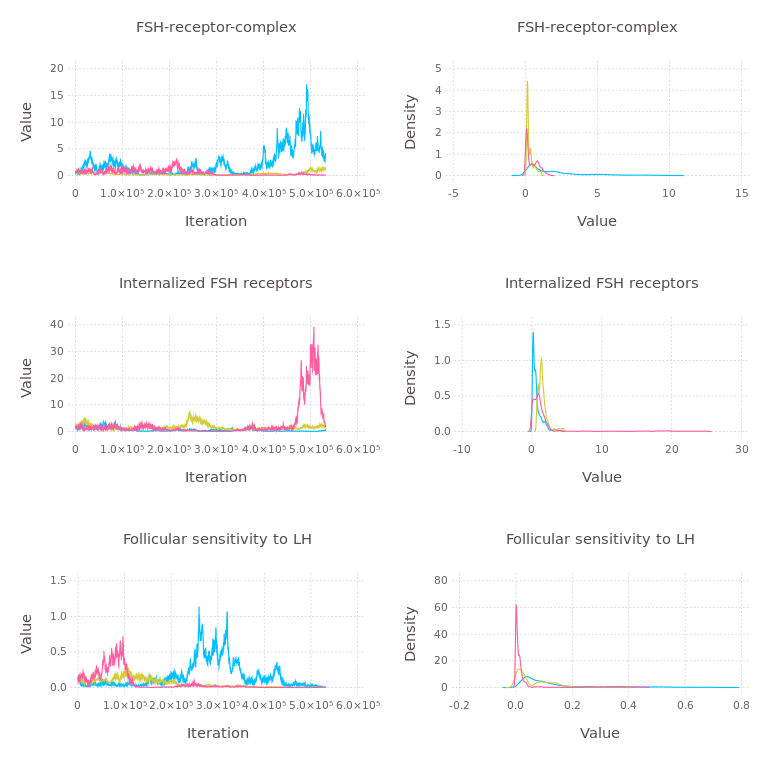

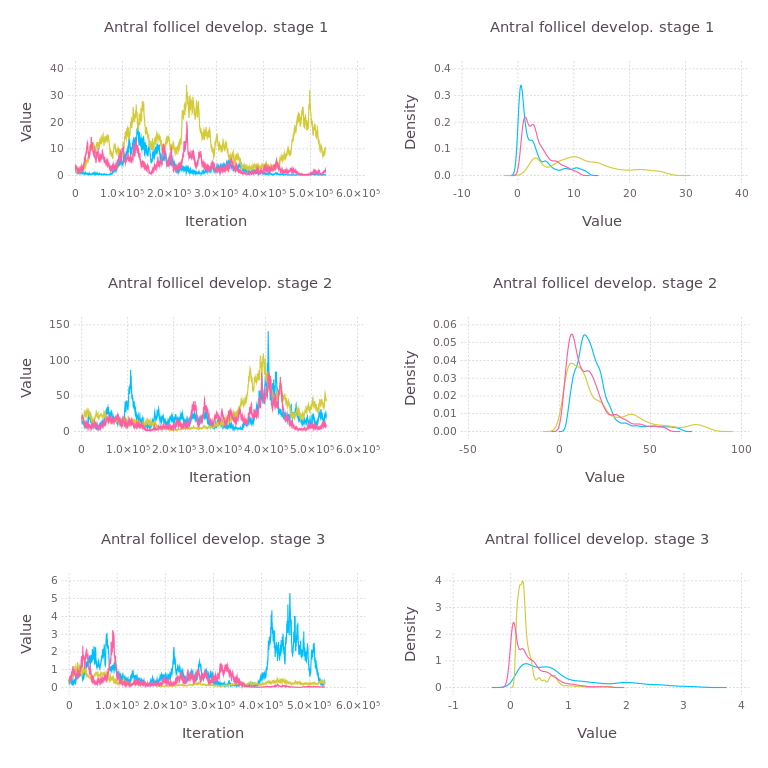

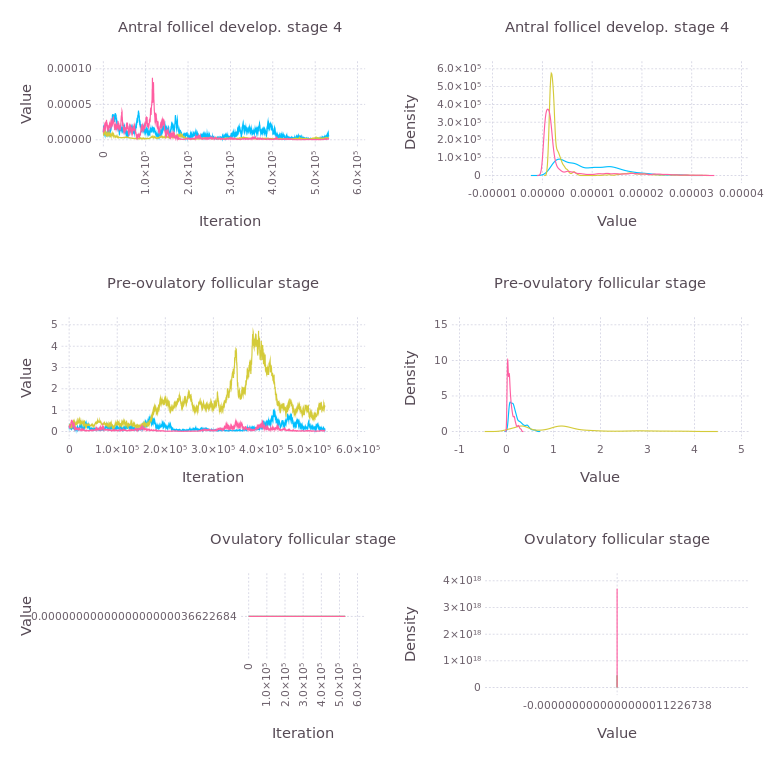

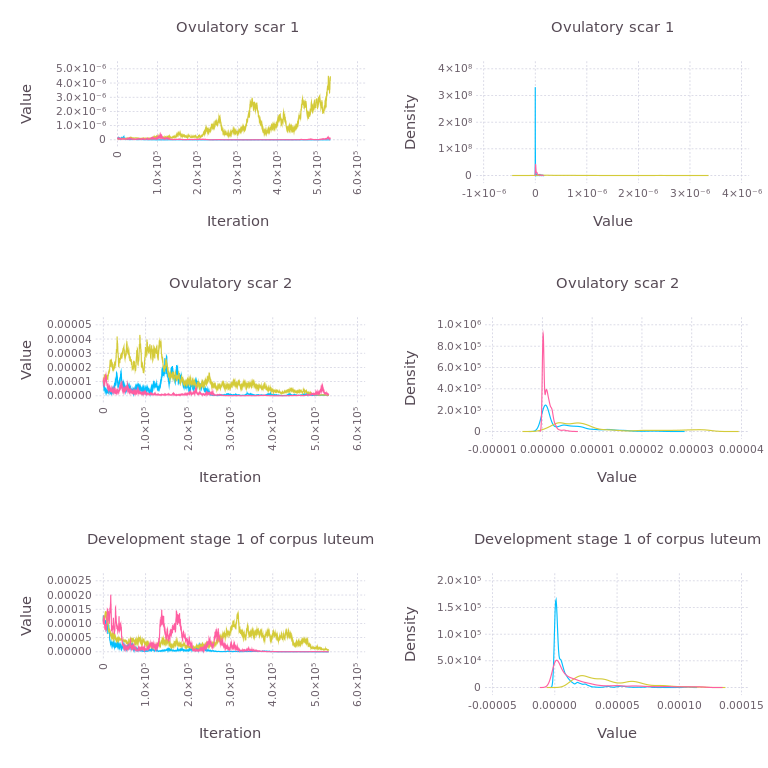

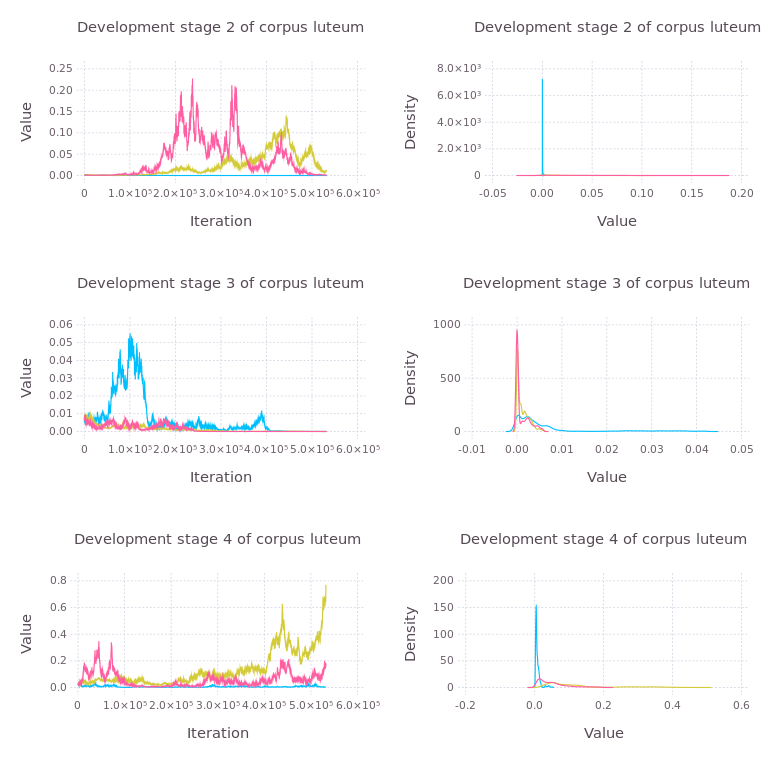

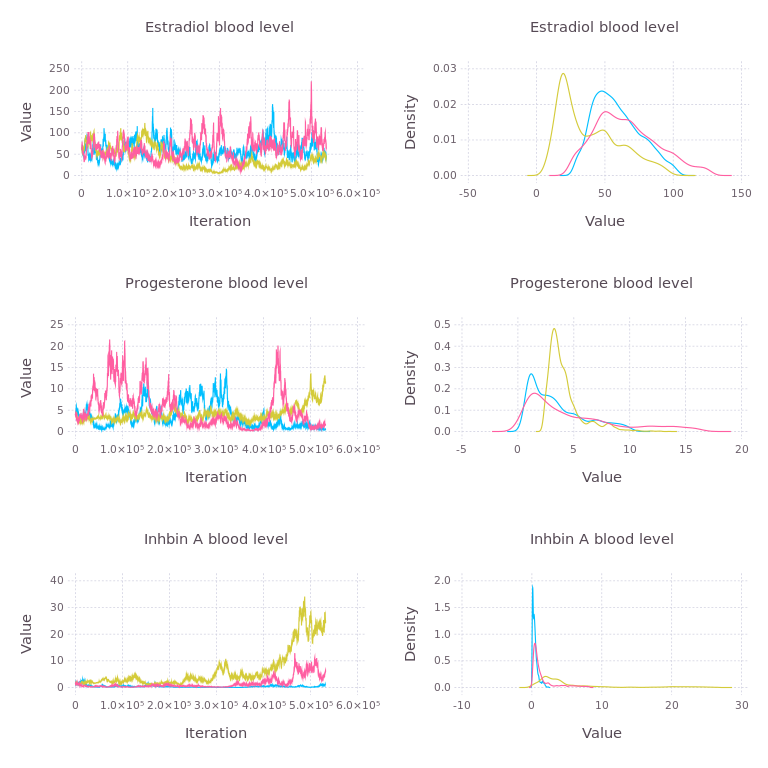

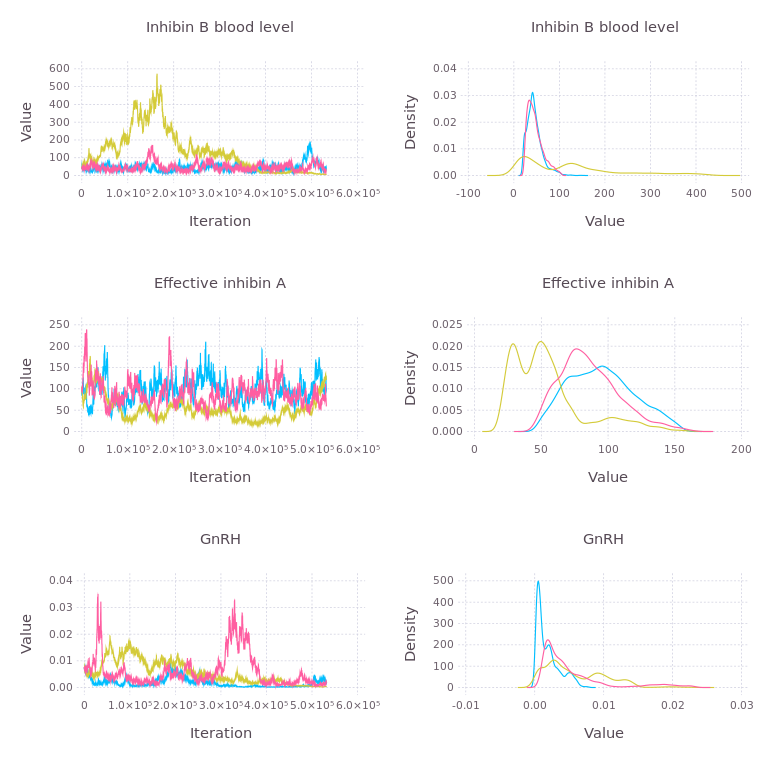

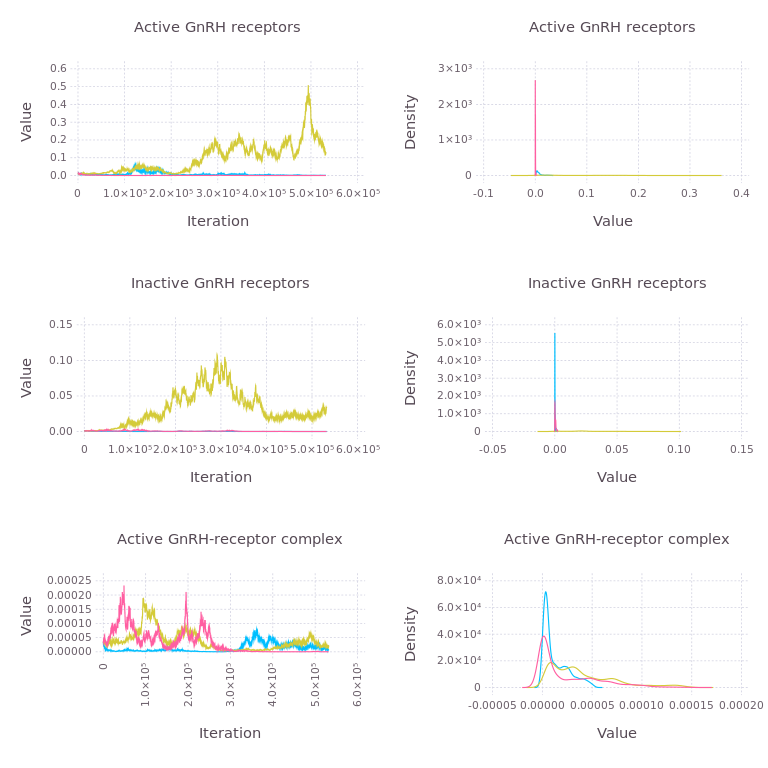

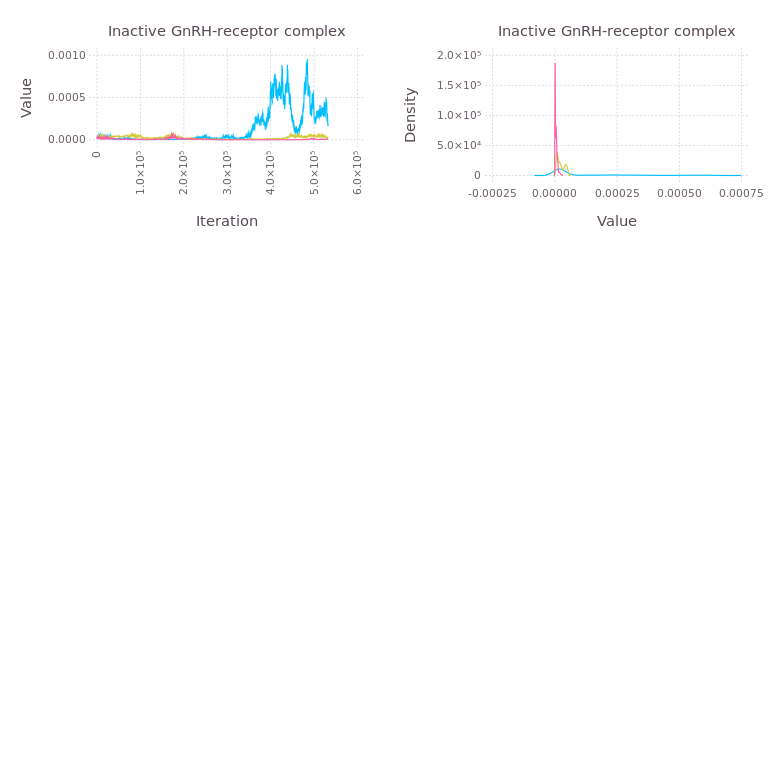

In [30]:
draw(plot(mcs[1:100:end,:,:]), ask=false, fmt=:png)

In [38]:
using Clustering
pmc = mc[:,:,1]

means = mapslices(Base.mean, pmc, 1)
scale = diagm(vec(means))
km = kmeans(inv(scale)*reshape(pmc,size(pmc)[[1,2]])',3)
(km.counts, scale * km.centers)

43552071115500957]

[0.19890116673868757]

[0.4217544292857584]


([6077,4631,5492],
115x3 Array{Float64,2}:
  7302.41          7369.71          7238.5        
  7355.88          7315.98          7310.99       
   170.457          190.227          164.386      
     2.86514          3.23248          4.0246     
     0.00497073       0.00528844       0.00546391 
     0.243913         0.167205         0.212278   
     0.000241808      8.85326e-5       0.000161237
     2.66819          1.70709          1.36412    
     2.9221           1.54619          2.99489    
    69.7624          91.7736          94.0114     
    62.4726          67.0437          55.2166     
   211.55           157.119          221.705      
 22055.1          22163.1          22123.9        
     ⋮                                            
     0.00629511       0.0075254        0.00767231 
     0.0239742        0.0113313        0.0117206  
    56.3978          56.2895          71.5879     
     4.81462          3.13561          3.36527    
     1.36521          2.40605          